#### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import seaborn as sns

from scipy.stats import ttest_ind

import pandas as pd
import holoviews as hv
from holoviews import opts

from tqdm import tqdm
import os

In [2]:
import torch
from torch import nn

#### Test for CUDA

In [3]:
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('No GPU, training on CPU')
    device = torch.device('cpu')
else:
    print('GPU found, training on GPU')
    device = torch.device('cuda')

GPU found, training on GPU


#### Initialize paths

In [4]:
nRuns = 5

In [5]:
latent_scaling = 16
pop_list_types = [12,2,1]

In [6]:
n_areas = 2
n_depths = 3

## Number of recurrent neurons in total
N = int(n_areas*n_depths*np.sum(pop_list_types)*latent_scaling)

#### Architecture

In [7]:
# Define the neural network
class CelltypeRNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, device):

        super(CelltypeRNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, num_layers=1, batch_first=True, nonlinearity='tanh', bias=False)

        self.fc1 = nn.Linear(round(pop_list_types[0]*latent_scaling), num_classes)
        self.fc2 = nn.Linear(round(pop_list_types[1]*latent_scaling), num_classes)
        self.fc3 = nn.Linear(round(pop_list_types[2]*latent_scaling), num_classes)
        self.fc4 = nn.Linear(round(pop_list_types[0]*latent_scaling), num_classes)
        self.fc5 = nn.Linear(round(pop_list_types[1]*latent_scaling), num_classes)
        self.fc6 = nn.Linear(round(pop_list_types[2]*latent_scaling), num_classes)
        self.fc7 = nn.Linear(round(pop_list_types[0]*latent_scaling), num_classes)
        self.fc8 = nn.Linear(round(pop_list_types[1]*latent_scaling), num_classes)
        self.fc9 = nn.Linear(round(pop_list_types[2]*latent_scaling), num_classes)

        self.fc10 = nn.Linear(round(pop_list_types[0]*latent_scaling), num_classes)
        self.fc11 = nn.Linear(round(pop_list_types[1]*latent_scaling), num_classes)
        self.fc12 = nn.Linear(round(pop_list_types[2]*latent_scaling), num_classes)
        self.fc13 = nn.Linear(round(pop_list_types[0]*latent_scaling), num_classes)
        self.fc14 = nn.Linear(round(pop_list_types[1]*latent_scaling), num_classes)
        self.fc15 = nn.Linear(round(pop_list_types[2]*latent_scaling), num_classes)
        self.fc16 = nn.Linear(round(pop_list_types[0]*latent_scaling), num_classes)
        self.fc17 = nn.Linear(round(pop_list_types[1]*latent_scaling), num_classes)
        self.fc18 = nn.Linear(round(pop_list_types[2]*latent_scaling), num_classes)

        self.fc1.weight.requires_grad = False
        self.fc1.bias.requires_grad = False

        self.fc2.weight.requires_grad = False
        self.fc2.bias.requires_grad = False

        self.fc3.weight.requires_grad = False
        self.fc3.bias.requires_grad = False

        self.fc4.weight.requires_grad = False
        self.fc4.bias.requires_grad = False

        self.fc5.weight.requires_grad = False
        self.fc5.bias.requires_grad = False

        self.fc6.weight.requires_grad = False
        self.fc6.bias.requires_grad = False

        self.fc7.weight.requires_grad = False
        self.fc7.bias.requires_grad = False

        self.fc8.weight.requires_grad = False
        self.fc8.bias.requires_grad = False

        self.fc9.weight.requires_grad = False
        self.fc9.bias.requires_grad = False

        self.fc10.weight.requires_grad = False
        self.fc10.bias.requires_grad = False

        self.fc11.weight.requires_grad = False
        self.fc11.bias.requires_grad = False

        self.fc12.weight.requires_grad = False
        self.fc12.bias.requires_grad = False

        self.fc13.weight.requires_grad = False
        self.fc13.bias.requires_grad = False

        self.fc14.weight.requires_grad = False
        self.fc14.bias.requires_grad = False

        self.fc15.weight.requires_grad = False
        self.fc15.bias.requires_grad = False

        self.fc16.weight.requires_grad = False
        self.fc16.bias.requires_grad = False

        self.fc17.weight.requires_grad = False
        self.fc17.bias.requires_grad = False

        self.fc18.weight.requires_grad = False
        self.fc18.bias.requires_grad = False

        self.n_classes = num_classes
        self.device = device

    def forward(self, x):
        ## Define input mask
        in_mask = torch.zeros(self.hidden_size, self.input_size).to(device)
        in_mask[start_V1_L4_Pyr:end_V1_L4_Pyr,0] = 1
        in_mask[start_V1_L4_SST:end_V1_L4_SST,1] = 1
        in_mask[start_V1_L4_VIP:end_V1_L4_VIP,2] = 1

        in_mask[start_V1_L23_Pyr:end_V1_L23_Pyr,3] = 1
        in_mask[start_V1_L23_SST:end_V1_L23_SST,4] = 1
        in_mask[start_V1_L23_VIP:end_V1_L23_VIP,5] = 1

        in_mask[start_V1_L5_Pyr:end_V1_L5_Pyr,6] = 1
        in_mask[start_V1_L5_SST:end_V1_L5_SST,7] = 1
        in_mask[start_V1_L5_VIP:end_V1_L5_VIP,8] = 1

        in_mask[start_LM_L4_Pyr:end_LM_L4_Pyr,9] = 1
        in_mask[start_LM_L4_SST:end_LM_L4_SST,10] = 1
        in_mask[start_LM_L4_VIP:end_LM_L4_VIP,11] = 1

        in_mask[start_LM_L23_Pyr:end_LM_L23_Pyr,12] = 1
        in_mask[start_LM_L23_SST:end_LM_L23_SST,13] = 1
        in_mask[start_LM_L23_VIP:end_LM_L23_VIP,14] = 1

        in_mask[start_LM_L5_Pyr:end_LM_L5_Pyr,15] = 1
        in_mask[start_LM_L5_SST:end_LM_L5_SST,16] = 1
        in_mask[start_LM_L5_VIP:end_LM_L5_VIP,17] = 1

        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        nSamp, inDim, nSteps = x.shape

        ops = torch.zeros(nSamp,nSteps,self.hidden_size, requires_grad=False).to(self.device)

        pred1 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred2 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred3 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred4 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred5 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred6 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred7 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred8 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred9 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)

        pred10 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred11 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred12 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred13 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred14 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred15 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred16 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred17 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)
        pred18 = torch.zeros(nSamp,nSteps,self.n_classes, requires_grad=False).to(self.device)

        for ii in range(nSteps):
            ## Apply input mask
            self.rnn.weight_ih_l0.data.mul(in_mask)

            ip = torch.unsqueeze(x[:,:,ii],-1).view(nSamp,1,inDim)
            op, ht = self.rnn(ip,h0) ## pass 1 timestep through RNN
            fr_mask = ht.clone()>0
            htt = fr_mask*ht.clone() ## mask firing rate
            h0 = htt ## update hidden state
            ops[:,ii,:] = torch.squeeze(op.clone())

            ## Final prediction at every timestep
            pred1[:,ii,:] = self.fc1(ops[:, ii, start_V1_L4_Pyr:end_V1_L4_Pyr].clone())
            pred2[:,ii,:] = self.fc2(ops[:, ii, start_V1_L4_SST:end_V1_L4_SST].clone())
            pred3[:,ii,:] = self.fc3(ops[:, ii, start_V1_L4_VIP:end_V1_L4_VIP].clone())
            pred4[:,ii,:] = self.fc4(ops[:, ii, start_V1_L23_Pyr:end_V1_L23_Pyr].clone())
            pred5[:,ii,:] = self.fc5(ops[:, ii, start_V1_L23_SST:end_V1_L23_SST].clone())
            pred6[:,ii,:] = self.fc6(ops[:, ii, start_V1_L23_VIP:end_V1_L23_VIP].clone())
            pred7[:,ii,:] = self.fc7(ops[:, ii, start_V1_L5_Pyr:end_V1_L5_Pyr].clone())
            pred8[:,ii,:] = self.fc8(ops[:, ii, start_V1_L5_SST:end_V1_L5_SST].clone())
            pred9[:,ii,:] = self.fc9(ops[:, ii, start_V1_L5_VIP:end_V1_L5_VIP].clone())

            pred10[:,ii,:] = self.fc10(ops[:, ii, start_LM_L4_Pyr:end_LM_L4_Pyr].clone())
            pred11[:,ii,:] = self.fc11(ops[:, ii, start_LM_L4_SST:end_LM_L4_SST].clone())
            pred12[:,ii,:] = self.fc12(ops[:, ii, start_LM_L4_VIP:end_LM_L4_VIP].clone())
            pred13[:,ii,:] = self.fc13(ops[:, ii, start_LM_L23_Pyr:end_LM_L23_Pyr].clone())
            pred14[:,ii,:] = self.fc14(ops[:, ii, start_LM_L23_SST:end_LM_L23_SST].clone())
            pred15[:,ii,:] = self.fc15(ops[:, ii, start_LM_L23_VIP:end_LM_L23_VIP].clone())
            pred16[:,ii,:] = self.fc16(ops[:, ii, start_LM_L5_Pyr:end_LM_L5_Pyr].clone())
            pred17[:,ii,:] = self.fc17(ops[:, ii, start_LM_L5_SST:end_LM_L5_SST].clone())
            pred18[:,ii,:] = self.fc18(ops[:, ii, start_LM_L5_VIP:end_LM_L5_VIP].clone())

        out1 = pred1.clone() #Take the output from the last time step
        out2 = pred2.clone() #Take the output from the last time step
        out3 = pred3.clone() #Take the output from the last time step
        out4 = pred4.clone() #Take the output from the last time step
        out5 = pred5.clone() #Take the output from the last time step
        out6 = pred6.clone() #Take the output from the last time step
        out7 = pred7.clone() #Take the output from the last time step
        out8 = pred8.clone() #Take the output from the last time step
        out9 = pred9.clone() #Take the output from the last time step

        out10 = pred10.clone() #Take the output from the last time step
        out11 = pred11.clone() #Take the output from the last time step
        out12 = pred12.clone() #Take the output from the last time step
        out13 = pred13.clone() #Take the output from the last time step
        out14 = pred14.clone() #Take the output from the last time step
        out15 = pred15.clone() #Take the output from the last time step
        out16 = pred16.clone() #Take the output from the last time step
        out17 = pred17.clone() #Take the output from the last time step
        out18 = pred18.clone() #Take the output from the last time step

        return torch.dstack((out1,out2, out3, out4, out5, out6, out7, out8, out9,
                             out10,out11, out12, out13, out14, out15, out16, out17, out18)), htt

#### Load weights, also always model 2 - model1

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
suffix1 = 'Familiar-No-Change-Sparse-Frozen-Vanilla/'
suffix2 = 'Familiar-Change-Sparse-Frozen-Vanilla/'

In [13]:
pp = '/content/drive/My Drive/Aish_celltypeRNN/Repeated-Runs-Dales-Pruning/'

In [14]:
npp = {}
path1 = {}
path2 = {}

model1 = {}
model2 = {}

In [15]:
for cntr in range(nRuns):
    npp[cntr] = 'celltype-dale-pruning-latent-16-'+str(cntr)
    path1[cntr] = pp + suffix1 + npp[cntr]+'/pts-'+str(cntr)+'/celltypeRNN-dale-sparse-'+str(latent_scaling)+'.pt'
    path2[cntr] = pp + suffix2 + npp[cntr]+'/pts-'+str(cntr)+'/celltypeRNN-dale-sparse-'+str(latent_scaling)+'.pt'

    model1[cntr] = CelltypeRNN(18, N, 1, device)
    model2[cntr] = CelltypeRNN(18, N, 1, device)

    model1[cntr].load_state_dict(torch.load(path1[cntr]))
    model2[cntr].load_state_dict(torch.load(path2[cntr]))

#### Make RNN weight numpys

In [16]:
weights1 = {}
weights2 = {}

In [17]:
for cntr in range(nRuns):
    weights1[cntr] = model1[cntr].rnn._parameters['weight_hh_l0'].cpu().detach().numpy()
    weights2[cntr] = model2[cntr].rnn._parameters['weight_hh_l0'].cpu().detach().numpy()

#### Block indices

In [18]:
## Population
label_arr_pop = ['V1_L4_pyr','V1_L4_sst','V1_L4_vip',
             'V1_L23_pyr','V1_L23_sst','V1_L23_vip',
             'V1_L5_pyr','V1_L5_sst','V1_L5_vip',
             'LM_L4_pyr','LM_L4_sst','LM_L4_vip',
             'LM_L23_pyr','LM_L23_sst','LM_L23_vip',
             'LM_L5_pyr','LM_L5_sst','LM_L5_vip']

## Layers
label_arr_layers = ['V1_L4', 'V1_L23', 'V1_L5', 'LM_L4', 'LM_L23', 'LM_L5']
## Areas
label_arr_areas = ['V1','LM']

In [19]:
n_cell_types = len(label_arr_pop)

In [20]:
start_V1_L4_Pyr = 0
end_V1_L4_Pyr = start_V1_L4_Pyr + pop_list_types[0]*latent_scaling

start_V1_L4_SST = end_V1_L4_Pyr
end_V1_L4_SST = start_V1_L4_SST + pop_list_types[1]*latent_scaling

start_V1_L4_VIP = end_V1_L4_SST
end_V1_L4_VIP = start_V1_L4_VIP + pop_list_types[2]*latent_scaling

## V1, L2/3
start_V1_L23_Pyr = end_V1_L4_VIP
end_V1_L23_Pyr = start_V1_L23_Pyr + pop_list_types[0]*latent_scaling

start_V1_L23_SST = end_V1_L23_Pyr
end_V1_L23_SST = start_V1_L23_SST + pop_list_types[1]*latent_scaling

start_V1_L23_VIP = end_V1_L23_SST
end_V1_L23_VIP = start_V1_L23_VIP + pop_list_types[2]*latent_scaling

## V1, L5
start_V1_L5_Pyr = end_V1_L23_VIP
end_V1_L5_Pyr = start_V1_L5_Pyr + pop_list_types[0]*latent_scaling

start_V1_L5_SST = end_V1_L5_Pyr
end_V1_L5_SST = start_V1_L5_SST + pop_list_types[1]*latent_scaling

start_V1_L5_VIP = end_V1_L5_SST
end_V1_L5_VIP = start_V1_L5_VIP + pop_list_types[2]*latent_scaling

## LM, L4
start_LM_L4_Pyr = end_V1_L5_VIP ## would need to be changed if using L6 populations as well
end_LM_L4_Pyr = start_LM_L4_Pyr + pop_list_types[0]*latent_scaling

start_LM_L4_SST = end_LM_L4_Pyr
end_LM_L4_SST = start_LM_L4_SST + pop_list_types[1]*latent_scaling

start_LM_L4_VIP = end_LM_L4_SST
end_LM_L4_VIP = start_LM_L4_VIP + pop_list_types[2]*latent_scaling

## LM, L2/3
start_LM_L23_Pyr = end_LM_L4_VIP
end_LM_L23_Pyr = start_LM_L23_Pyr + pop_list_types[0]*latent_scaling

start_LM_L23_SST = end_LM_L23_Pyr
end_LM_L23_SST = start_LM_L23_SST + pop_list_types[1]*latent_scaling

start_LM_L23_VIP = end_LM_L23_SST
end_LM_L23_VIP = start_LM_L23_VIP + pop_list_types[2]*latent_scaling

## LM, L5
start_LM_L5_Pyr = end_LM_L23_VIP
end_LM_L5_Pyr = start_LM_L5_Pyr + pop_list_types[0]*latent_scaling

start_LM_L5_SST = end_LM_L5_Pyr
end_LM_L5_SST = start_LM_L5_SST + pop_list_types[1]*latent_scaling

start_LM_L5_VIP = end_LM_L5_SST
end_LM_L5_VIP = start_LM_L5_VIP + pop_list_types[2]*latent_scaling

In [21]:
## Population
block_indices_pop = [(start_V1_L4_Pyr,end_V1_L4_Pyr), (start_V1_L4_SST,end_V1_L4_SST), (start_V1_L4_VIP,end_V1_L4_VIP),
                 (start_V1_L23_Pyr,end_V1_L23_Pyr), (start_V1_L23_SST,end_V1_L23_SST), (start_V1_L23_VIP,end_V1_L23_VIP),
                 (start_V1_L5_Pyr,end_V1_L5_Pyr), (start_V1_L5_SST,end_V1_L5_SST), (start_V1_L5_VIP,end_V1_L5_VIP),
                 (start_LM_L4_Pyr,end_LM_L4_Pyr), (start_LM_L4_SST,end_LM_L4_SST), (start_LM_L4_VIP,end_LM_L4_VIP),
                 (start_LM_L23_Pyr,end_LM_L23_Pyr), (start_LM_L23_SST,end_LM_L23_SST), (start_LM_L23_VIP,end_LM_L23_VIP),
                 (start_LM_L5_Pyr,end_LM_L5_Pyr), (start_LM_L5_SST,end_LM_L5_SST), (start_LM_L5_VIP,end_LM_L5_VIP)]

In [22]:
## Layers
block_indices_layers = [(start_V1_L4_Pyr,end_V1_L4_VIP), (start_V1_L23_Pyr,end_V1_L23_VIP), (start_V1_L5_Pyr,end_V1_L5_VIP),
                        (start_LM_L4_Pyr,end_LM_L4_VIP), (start_LM_L23_Pyr,end_LM_L23_VIP), (start_LM_L5_Pyr,end_LM_L5_VIP)]

In [23]:
## Areas
block_indices_areas = [(start_V1_L4_Pyr,end_V1_L5_VIP), (start_LM_L4_Pyr,end_LM_L5_VIP)]

#### Generate block-averaged weight matrices

In [24]:
def average_weights_in_blocks_matrix(weight_matrix, block_indices, use_absolute_values=False):
    n_blocks = len(block_indices)
    averages_matrix = np.zeros((n_blocks, n_blocks))

    for i, (start_i, end_i) in enumerate(block_indices):
        for j, (start_j, end_j) in enumerate(block_indices):
            block_weights = weight_matrix[start_i:end_i, start_j:end_j]  # Extract the block of weights ##had +1 at end_js

            if use_absolute_values:
                block_weights = np.abs(block_weights)

            block_average = np.mean(block_weights)  # Calculate the average
            averages_matrix[i, j] = block_average

    return averages_matrix


def average_sparsity_in_blocks_matrix(weight_matrix, block_indices):
    n_blocks = len(block_indices)
    averages_matrix = np.zeros((n_blocks, n_blocks))

    for i, (start_i, end_i) in enumerate(block_indices):
        for j, (start_j, end_j) in enumerate(block_indices):
            block_prob = np.count_nonzero(abs(weight_matrix[start_i:end_i, start_j:end_j]) >= 1e-5)  # Extract the block of weights ##had +1 at end_js


            block_average = block_prob/weight_matrix[start_i:end_i, start_j:end_j].size  # Calculate the average
            averages_matrix[i, j] = block_average

    return averages_matrix

In [25]:
model1_pop = {}
model2_pop = {}

model1_layers = {}
model2_layers = {}

model1_areas = {}
model2_areas = {}

model1_layers_prob = {}
model2_layers_prob = {}

In [26]:
for cntr in range(nRuns):
    ## Populations
    model1_pop[cntr] = average_weights_in_blocks_matrix(weights1[cntr], block_indices_pop, use_absolute_values=True)
    model2_pop[cntr] = average_weights_in_blocks_matrix(weights2[cntr], block_indices_pop, use_absolute_values=True)

    ##Layers
    model1_layers[cntr] = average_weights_in_blocks_matrix(weights1[cntr], block_indices_layers, use_absolute_values=True)
    model2_layers[cntr] = average_weights_in_blocks_matrix(weights2[cntr], block_indices_layers, use_absolute_values=True)

    ##Areas
    model1_areas[cntr] = average_weights_in_blocks_matrix(weights1[cntr], block_indices_areas, use_absolute_values=True)
    model2_areas[cntr] = average_weights_in_blocks_matrix(weights2[cntr], block_indices_areas, use_absolute_values=True)

    model1_layers_prob[cntr] = average_sparsity_in_blocks_matrix(weights1[cntr], block_indices_layers)
    model2_layers_prob[cntr] = average_sparsity_in_blocks_matrix(weights2[cntr], block_indices_layers)

In [27]:
model1_layers_prob_mean = 0
model2_layers_prob_mean = 0
for cntr in range(nRuns):
    model1_layers_prob_mean += model1_layers_prob[cntr]
    model2_layers_prob_mean += model2_layers_prob[cntr]

model1_layers_prob_mean = model1_layers_prob_mean/nRuns
model2_layers_prob_mean = model2_layers_prob_mean/nRuns

model_layers_prob_mean = (model1_layers_prob_mean + model2_layers_prob_mean)/2

#### Compute differences (always model2-model1)

In [28]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [29]:
diff_pop_all = np.zeros((nRuns*nRuns,model1_pop[0].shape[0],model1_pop[0].shape[1]))
diff_layers_all = np.zeros((nRuns*nRuns,model1_layers[0].shape[0],model1_layers[0].shape[1]))
diff_areas_all = np.zeros((nRuns*nRuns,model1_areas[0].shape[0],model1_areas[0].shape[1]))

In [30]:
kk = 0
for cntr1 in range(nRuns):
    for cntr2 in range(nRuns):
        diff_pop_all[kk] = model2_pop[cntr2] - model1_pop[cntr1]
        diff_layers_all[kk] = model2_layers[cntr2] - model1_layers[cntr1]
        diff_areas_all[kk] = model2_areas[cntr2] - model1_areas[cntr1]
        kk += 1

In [31]:
diff_pop = np.mean(diff_pop_all,0)
diff_layers = np.mean(diff_layers_all,0)
diff_areas = np.mean(diff_areas_all,0)

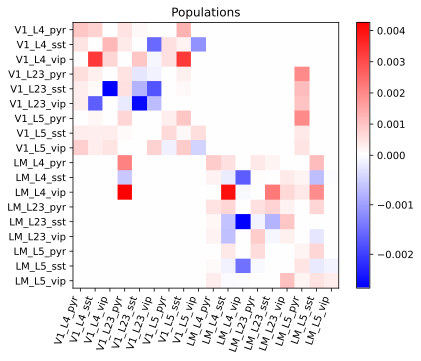

In [32]:
plt.imshow(diff_pop, cmap='bwr', norm=TwoSlopeNorm(vmin=np.min(diff_pop), vcenter=0))
plt.title("Populations")
plt.colorbar()
plt.xticks(np.arange(len(label_arr_pop)), label_arr_pop, rotation=70, ha='right')
plt.yticks(np.arange(len(label_arr_pop)), label_arr_pop)
plt.show()

In [33]:
# let's swap the order for layers to make it L23, L4, L5
diff_layers_re = diff_layers.copy()

# Swap first and second rows/columns
diff_layers_re[[0, 1]] = diff_layers_re[[1, 0]]  # Swap rows
diff_layers_re[:, [0, 1]] = diff_layers_re[:, [1, 0]]  # Swap columns

# Swap fourth and fifth rows/columns
diff_layers_re[[3, 4]] = diff_layers_re[[4, 3]]  # Swap rows
diff_layers_re[:, [3, 4]] = diff_layers_re[:, [4, 3]]  # Swap columns

model_layers_prob_mean_re = model_layers_prob_mean.copy()
model_layers_prob_mean_re[[0, 1]] = model_layers_prob_mean_re[[1, 0]]  # Swap rows
model_layers_prob_mean_re[:, [0, 1]] = model_layers_prob_mean_re[:, [1, 0]] # Swap columns

model_layers_prob_mean_re[[3, 4]] = model_layers_prob_mean_re[[4, 3]]  # Swap rows
model_layers_prob_mean_re[:, [3, 4]] = model_layers_prob_mean_re[:, [4, 3]]


# Reordering the labels in the same way
label_arr_layers_re = label_arr_layers.copy()
label_arr_layers_re[0], label_arr_layers_re[1] = label_arr_layers_re[1], label_arr_layers_re[0]  # Swap first and second
label_arr_layers_re[3], label_arr_layers_re[4] = label_arr_layers_re[4], label_arr_layers_re[3]

In [ ]:
print(diff_layers_re)
print(np.min(diff_layers_re))

[[ 5.65433921e-04  5.15371189e-04  5.64493646e-05  0.00000000e+00
   0.00000000e+00  5.56022907e-04]
 [ 3.74471932e-04  5.42198541e-04  3.03676515e-04  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.38259419e-04 -3.79385310e-05  3.92154395e-04  0.00000000e+00
   0.00000000e+00  7.98535720e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.54357187e-04
   3.31646856e-04  1.10783835e-04]
 [ 1.39155351e-03  0.00000000e+00  0.00000000e+00  5.38063236e-05
   4.05959971e-04  7.51044718e-05]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.33928487e-04
   2.05991650e-04  2.80287443e-04]]
-3.793853102251887e-05


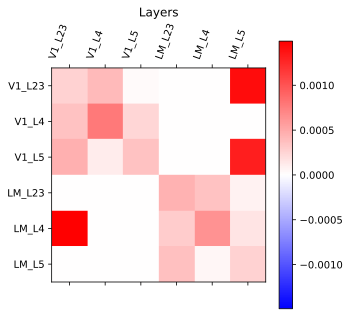

In [34]:
#plt.imshow(diff_layers_re, cmap='bwr', norm=TwoSlopeNorm(vcenter=0))

plt.matshow(diff_layers_re, cmap='bwr',  vmin=-np.max(abs(diff_layers_re)), vmax=np.max(abs(diff_layers_re)))
plt.title("Layers")
plt.colorbar()
plt.xticks(np.arange(len(label_arr_layers_re)), label_arr_layers_re, rotation=70, ha='right')
plt.yticks(np.arange(len(label_arr_layers_re)), label_arr_layers_re)

#plt.savefig('/content/drive/My Drive/Aish_celltypeRNN/celltype-comparisons/Thursday_Morning_With_A_Bagel/' + suffix1[:-8] +'vs' + suffix2[:-8] + '.svg', format='svg')
plt.show()


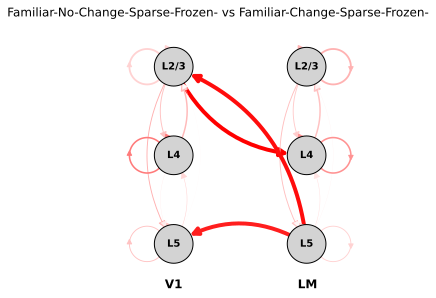

In [35]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.colors as mcolors

color_matrix = diff_layers_re.T
width_matrix = model_layers_prob_mean_re.T

# Create a sample 6x6 connection matrix
#pos_color = 'salmon'
#neg_color = 'lightblue'
w_scale = 4
norm = mcolors.Normalize(vmin=-abs(color_matrix).max(), vmax=abs(color_matrix).max())
#cmap = plt.cm.RdBu
cmap = plt.cm.bwr



# Create a directed graph
G = nx.DiGraph()

# Add nodes
for i in range(1, 7):
    G.add_node(i)

edge_colors = []
# Add edges based on connection matrix
for i in range(6):
    for j in range(6):
        prob = width_matrix[i, j] # thickness by prob
        weight = color_matrix[i, j] # color by value
        if weight != 0:  # only add edges with non-zero weights
            G.add_edge(i+1, j+1, weight=prob)
            edge_colors.append(cmap(norm(weight)))

# Manually set the positions of the nodes
pos = {
    1: (0, 1),  # Node 1 at (0,1)
    2: (0, 0),  # Node 2 at (0,0)
    3: (0, -1), # Node 3 at (0,-1)
    4: (1.5, 1),  # Node 4 at (1,1)
    5: (1.5, 0),  # Node 5 at (1,0)
    6: (1.5, -1)  # Node 6 at (1,-1)
}

custom_labels = {1: 'L2/3', 2: 'L4', 3: 'L5', 4: 'L2/3', 5: 'L4', 6: 'L5'}

fig, ax = plt.subplots()
ax.set_xlim(-1.5, 2.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')  # Set the aspect ratio to be equal

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=1500, edgecolors='black', label=None)

# Draw non-self-loop edges
non_self_loops = [(u, v) for u, v in G.edges() if u != v]
positive_edges = [(i, j) for i, j in G.edges() if G[i][j]['weight'] > 0]
negative_edges = [(i, j) for i, j in G.edges() if G[i][j]['weight'] < 0]

edge_widths_positive = [G[u][v]['weight']*w_scale/np.max(abs(width_matrix)) for u, v in positive_edges] # Scale weight for visualization
edge_widths_negative = [G[u][v]['weight']*w_scale/np.max(abs(width_matrix)) for u, v in negative_edges] # Scale weight for visualization
#edge_widths_positive = [w_scale for u, v in positive_edges] # Scale weight for visualization
#edge_widths_negative = [w_scale for u, v in negative_edges] # Scale weight for visualization

nx.draw_networkx_edges(G, pos, edgelist=positive_edges, width=edge_widths_positive,edge_color=edge_colors,
                       arrows=True, arrowstyle='-|>', connectionstyle='arc3,rad=0.3',
                       arrowsize=[ 15 for x in edge_widths_positive], min_target_margin=18)

nx.draw_networkx_edges(G, pos, edgelist=negative_edges, width=edge_widths_negative,edge_color=edge_colors,
                       arrows=True, arrowstyle='-|>', connectionstyle='arc3,rad=0.3',
                       arrowsize=[ 15 for x in edge_widths_negative], min_target_margin=18)

# Draw self-loops with a custom circular style
self_loops = [(u, v) for u, v in G.edges() if u == v]
edge_widths_loop = [G[u][v]['weight']*w_scale/np.max(abs(width_matrix)) for u, v in self_loops]

for u, v in self_loops:
    connect_prob = G[u][v]['weight']*w_scale/np.max(abs(width_matrix))
    color_loop = cmap(norm(color_matrix[u-1, v-1]))

    if weight >= 0:
        if u <= 3:
            loop = plt.Circle((pos[u][0]-0.3, pos[u][1]), 0.2, color=color_loop, fill=False, linewidth=connect_prob)

            plt.arrow(pos[u][0]-0.5, pos[u][1], 0, 0.05, head_width=0.05, head_length=0.05, fc=color_loop, ec=color_loop, length_includes_head=True)# Draw circle for self-loops
        else:
            loop = plt.Circle((pos[u][0]+0.3, pos[u][1]), 0.2, color=color_loop, fill=False, linewidth=connect_prob)
            plt.arrow(pos[u][0]+0.5, pos[u][1], 0, -0.05, head_width=0.05, head_length=0.05, fc=color_loop, ec=color_loop, length_includes_head=True)# Draw circle for self-loops
    else:
        loop = plt.Circle((pos[u][0]+0.3, pos[u][1]), 0.2, color=color_loop, fill=False, linewidth=connect_prob)
        plt.arrow(pos[u][0]-0.5, pos[u][1], 0, -0.05, head_width=0.05, head_length=0.05, fc=color_loop, ec=color_loop, length_includes_head=True)# Draw circle for self-loops
    ax.add_artist(loop)

#plt.arrow(start_point[0], start_point[1], dx, dy, head_width=0.15, head_length=0.15, fc='blue', ec='blue', length_includes_head=True)
# Labels and title
nx.draw_networkx_labels(G, pos, labels=custom_labels, font_size=10, font_color='black', font_family='sans-serif', font_weight='bold')
plt.text(1.4, -1.5, "LM",  fontsize=12, fontweight='bold')
plt.text(-0.1, -1.5, "V1",  fontsize=12, fontweight='bold')
plt.title(suffix1[:-8]  + ' vs ' +suffix2[:-8])
plt.axis('off')  # Turn off the axis


#plt.savefig('/content/drive/My Drive/Aish_celltypeRNN/celltype-comparisons/Thursday_Morning_With_A_Bagel/network_' + suffix1[:-8] +'vs' + suffix2[:-8] + '.svg', format='svg')
plt.show()

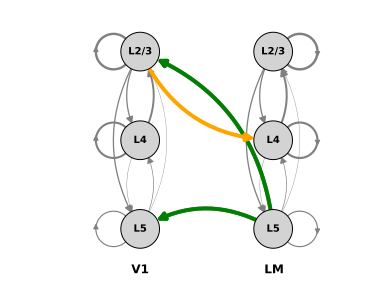

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import matplotlib.colors as mcolors

color_matrix = diff_layers_re.T
width_matrix = model_layers_prob_mean_re.T

# Create a sample 6x6 connection matrix
#pos_color = 'salmon'
#neg_color = 'lightblue'
w_scale = 4
norm = mcolors.Normalize(vmin=-abs(color_matrix).max(), vmax=abs(color_matrix).max())

# Create a directed graph
G = nx.DiGraph()

# Add nodes
for i in range(1, 7):
    G.add_node(i)

edge_colors = []
# Add edges based on connection matrix
for i in range(6):
    for j in range(6):
        prob = width_matrix[i, j] # thickness by prob
        weight = color_matrix[i, j] # color by value
        if weight != 0:  # only add edges with non-zero weights
            G.add_edge(i+1, j+1, weight=prob)

# Manually set the positions of the nodes
pos = {
    1: (0, 1),  # Node 1 at (0,1)
    2: (0, 0),  # Node 2 at (0,0)
    3: (0, -1), # Node 3 at (0,-1)
    4: (1.5, 1),  # Node 4 at (1,1)
    5: (1.5, 0),  # Node 5 at (1,0)
    6: (1.5, -1)  # Node 6 at (1,-1)
}

custom_labels = {1: 'L2/3', 2: 'L4', 3: 'L5', 4: 'L2/3', 5: 'L4', 6: 'L5'}

fig, ax = plt.subplots()
ax.set_xlim(-1.5, 2.5)
ax.set_ylim(-1.5, 1.5)
ax.set_aspect('equal')  # Set the aspect ratio to be equal

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=1500, edgecolors='black', label=None)

# Draw non-self-loop edges
non_self_loops = [(u, v) for u, v in G.edges() if u != v and (u, v)!=(1, 5)]
edges_fw = [(u, v) for u, v in G.edges() if (u, v)==(1, 5)]
edges_back = [(u, v) for u, v in G.edges() if (u, v)==(6, 1) or (u, v) ==(6, 3)]


edge_widths_nonself = [G[u][v]['weight']*w_scale/np.max(abs(width_matrix)) for u, v in non_self_loops] # Scale weight for visualization
edge_widths_fw = [G[u][v]['weight']*w_scale/np.max(abs(width_matrix)) for u, v in edges_fw] # Scale weight for visualization
edge_widths_back = [G[u][v]['weight']*w_scale/np.max(abs(width_matrix)) for u, v in edges_back] # Scale weight for visualization


nx.draw_networkx_edges(G, pos, edgelist=non_self_loops, width=edge_widths_nonself,edge_color='gray',
                       arrows=True, arrowstyle='-|>', connectionstyle='arc3,rad=0.3',
                       arrowsize=[ 15 for x in edge_widths_nonself], min_target_margin=18)

nx.draw_networkx_edges(G, pos, edgelist=edges_back, width=edge_widths_back,edge_color='green',
                       arrows=True, arrowstyle='-|>', connectionstyle='arc3,rad=0.3',
                       arrowsize=[ 15 for x in edge_widths_back], min_target_margin=18)

nx.draw_networkx_edges(G, pos, edgelist=edges_fw, width=edge_widths_fw,edge_color='orange',
                       arrows=True, arrowstyle='-|>', connectionstyle='arc3,rad=0.3',
                       arrowsize=[ 15 for x in edges_fw], min_target_margin=18)


# Draw self-loops with a custom circular style
self_loops = [(u, v) for u, v in G.edges() if u == v]
edge_widths_loop = [G[u][v]['weight']*w_scale/np.max(abs(width_matrix)) for u, v in self_loops]

for u, v in self_loops:
    connect_prob = G[u][v]['weight']*w_scale/np.max(abs(width_matrix))
    color_loop = 'gray'

    if u <= 3:
        loop = plt.Circle((pos[u][0]-0.3, pos[u][1]), 0.2, color=color_loop, fill=False, linewidth=connect_prob)

        plt.arrow(pos[u][0]-0.5, pos[u][1], 0, 0.05, head_width=0.05, head_length=0.05, fc=color_loop, ec=color_loop, length_includes_head=True)# Draw circle for self-loops
    else:
        loop = plt.Circle((pos[u][0]+0.3, pos[u][1]), 0.2, color=color_loop, fill=False, linewidth=connect_prob)
        plt.arrow(pos[u][0]+0.5, pos[u][1], 0, -0.05, head_width=0.05, head_length=0.05, fc=color_loop, ec=color_loop, length_includes_head=True)# Draw circle for self-loops

    ax.add_artist(loop)

#plt.arrow(start_point[0], start_point[1], dx, dy, head_width=0.15, head_length=0.15, fc='blue', ec='blue', length_includes_head=True)
# Labels and title
nx.draw_networkx_labels(G, pos, labels=custom_labels, font_size=10, font_color='black', font_family='sans-serif', font_weight='bold')
plt.text(1.4, -1.5, "LM",  fontsize=12, fontweight='bold')
plt.text(-0.1, -1.5, "V1",  fontsize=12, fontweight='bold')
#plt.title(suffix1[:-8]  + ' vs ' +suffix2[:-8])
plt.axis('off')  # Turn off the axis


plt.savefig('/content/drive/My Drive/Aish_celltypeRNN/celltype-comparisons/Thursday_Morning_With_A_Bagel/network_structure.svg', format='svg')
plt.show()

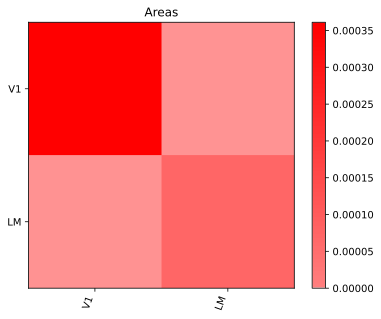

In [ ]:
plt.imshow(diff_areas, cmap='bwr', norm=TwoSlopeNorm(vcenter=0))
plt.title("Areas")
plt.colorbar()
plt.xticks(np.arange(len(label_arr_areas)), label_arr_areas, rotation=70, ha='right')
plt.yticks(np.arange(len(label_arr_areas)), label_arr_areas)
plt.show()

#### Sankey diagrams

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
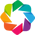

In [ ]:
hv.extension('bokeh')

In [ ]:
def create_sankey(matrix, labels):
    # Ensure the input is a square matrix
    assert matrix.shape[0] == matrix.shape[1], "The input matrix must be square"
    assert matrix.shape[0] == len(labels), "The number of labels must match the dimensions of the matrix"

    sources, targets, values = [], [], []

    # Populate sources, targets, and values based on the matrix
    for ii in range(matrix.shape[0]):
        for jj in range(matrix.shape[1]):
            sources.append(labels[jj]+'_source')
            targets.append(labels[ii]+'_target')
            values.append(matrix[ii,jj])

    # Create a DataFrame
    data = pd.DataFrame({
        'source': sources,
        'target': targets,
        'value': values
    })

    # Create the Sankey diagram
    sankey = hv.Sankey(data)

    # Customize options
    sankey.opts(opts.Sankey(width=600, height=400, cmap='Category20', edge_color=hv.dim('source').str()))

    return sankey

In [ ]:
sankey_pop = create_sankey(diff_pop, label_arr_pop)
sankey_pop

:Sankey   [source,target]   (value)

In [ ]:
sankey_layers = create_sankey(diff_layers, label_arr_layers)
sankey_layers

:Sankey   [source,target]   (value)

In [ ]:
# sankey_areas = create_sankey(diff_areas, label_arr_areas)
# sankey_areas

#### Scatter plot heatmap

In [ ]:
def create_scatter_heat(matrix, labels, av_mask):
    # Ensure the input is a square matrix
    assert matrix.shape[0] == matrix.shape[1], "The input matrix must be square"
    assert matrix.shape[0] == len(labels), "The number of labels must match the dimensions of the matrix"
    assert matrix.shape == av_mask.shape, "The input matrix and connection probabilities  must be of same size"

    sources, targets, values, probs = [], [], [], []

    # Populate sources, targets, and values based on the matrix
    for ii in range(matrix.shape[0]):
        for jj in range(matrix.shape[1]):
            sources.append(labels[jj]+'_source')
            targets.append(labels[ii]+'_target')
            values.append(matrix[ii,jj])
            probs.append(av_mask[ii,jj])

    # Create a DataFrame
    data = pd.DataFrame({
        'source': sources,
        'target': targets,
        'value': values,
        'confidence': probs
    })

    # Customize color bar to ensure it is centered around 0
    norm = TwoSlopeNorm(vmin=data['value'].min(), vcenter=0, vmax=data['value'].max())

    # Apply normalization to the hue data
    data['value_normalized'] = norm(data['value'])

    # Create the scatterplot heatmap diagram
    # Draw each cell as a scatter point with varying size and color
    g = sns.relplot(
        data=data,
        x="source", y="target", hue="value_normalized", size="confidence",
        palette="vlag", edgecolor=".7")

    # Tweak the figure to finalize
    g.set(xlabel="", ylabel="", aspect="equal")
    g.despine(left=True, bottom=True)
    g.ax.margins(.02)
    for label in g.ax.get_xticklabels():
        label.set_rotation(90)

    return g

In [ ]:
def calculate_dispersion_and_significance(data, dispersion_type):
    """
    Calculate dispersion for each element across multiple runs and their significance.

    Parameters:
    - data: numpy array of shape (nRuns, val1, val2)
    - dispersion_type: str, one of ['std', 'var', 'range', 'iqr', 'cv']

    Returns:
    - dispersion: numpy array of shape (val1, val2)
    - significance: numpy array of p-values with shape (val1, val2)
    """

    # Check if input data is a numpy array
    if not isinstance(data, np.ndarray):
        raise ValueError("Data should be a numpy array")

    # Check if the dispersion_type is valid
    valid_types = ['std', 'var', 'range', 'iqr', 'cv']
    if dispersion_type not in valid_types:
        raise ValueError(f"Dispersion type should be one of {valid_types}")

    # Initialize the output arrays
    val1, val2 = data.shape[1], data.shape[2]
    dispersion = np.zeros((val1, val2))
    significance = np.zeros((val1, val2))

    for ii in range(val1):
        for jj in range(val2):
            values = data[:, ii, jj]
            if dispersion_type == 'std':
                dispersion[ii, jj] = np.std(values)
            elif dispersion_type == 'var':
                dispersion[ii, jj] = np.var(values)
            elif dispersion_type == 'range':
                dispersion[ii, jj] = np.ptp(values)
            elif dispersion_type == 'iqr':
                dispersion[ii, jj] = np.percentile(values, 75) - np.percentile(values, 25)
            elif dispersion_type == 'cv':
                dispersion[ii, jj] = 1-np.std(values) / np.mean(values)

            # Perform t-test for significance
            t_stat, p_value = ttest_ind(values, values)
            significance[ii, jj] = p_value

    return dispersion, significance

In [ ]:
dispersion_type = 'cv'
disp_pop, sig_pop = calculate_dispersion_and_significance(diff_pop_all, dispersion_type)
disp_layers, sig_layers = calculate_dispersion_and_significance(diff_layers_all, dispersion_type)
disp_areas, sig_areas = calculate_dispersion_and_significance(diff_areas_all, dispersion_type)

<ipython-input-55-df5608b08539>:40: RuntimeWarning: invalid value encountered in scalar divide
  dispersion[ii, jj] = 1-np.std(values) / np.mean(values)


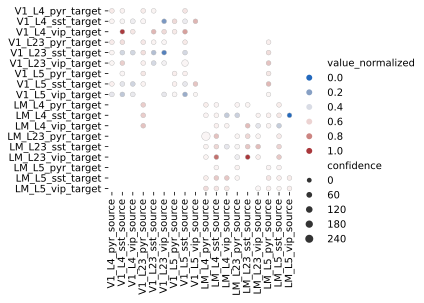

In [ ]:
g_pop = create_scatter_heat(diff_pop, label_arr_pop, disp_pop)

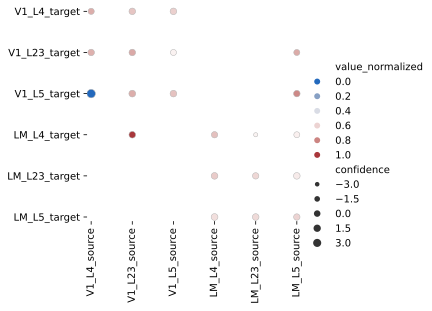

In [ ]:
g_layers = create_scatter_heat(diff_layers, label_arr_layers, disp_layers)

In [ ]:
g_areas = create_scatter_heat(diff_areas, label_arr_areas, disp_areas)

ValueError: vmin, vcenter, and vmax must be in ascending order